In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
import MyDifferentialEvolution as DE
import os

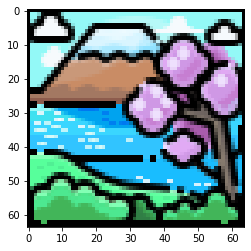

In [ ]:

img2 = cv2.imread('/content/drive/MyDrive/Imagenes/icons8-mountain-64(1).png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img2)
plt.show()

In [ ]:
def individual_fitness(ind,img1,img2):
  black = np.zeros(img1.shape,np.uint8)
  black = cv2.circle(black,(abs(int(ind[0])), abs(int(ind[1]))),abs(int(ind[2])),(abs(int(ind[3])),abs(int(ind[4])),abs(int(ind[5])) ),-1)
  newImg = cv2.addWeighted(img1,1.0,black,ind[6],1)
  diff = np.linalg.norm(cv2.absdiff(newImg,img2))
  return diff

In [ ]:
height, width,_ = img2.shape
b = [[0,width],#X
     [0,height],#Y
     [1,min(width,height)-1],#r
     [0,254],#R
     [0,254],#G
     [0,254],#B
     [0.5,1.0]#alpha
     ]

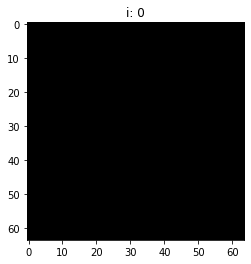

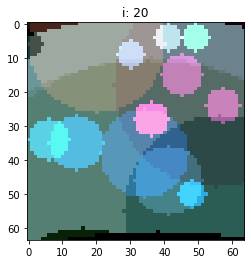

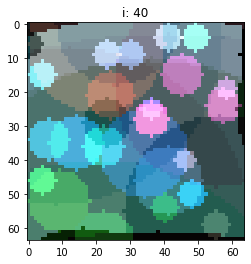

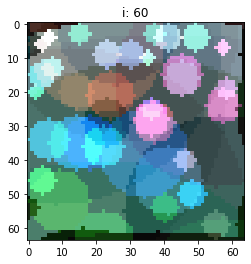

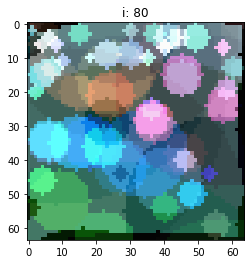

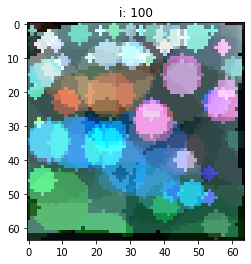

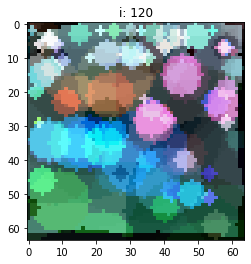

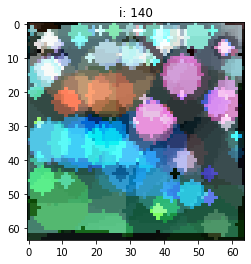

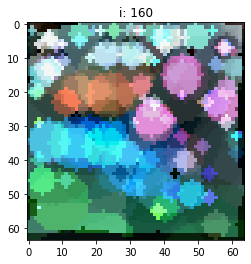

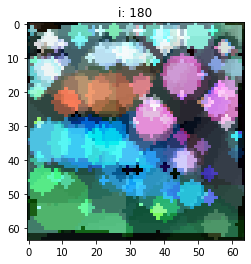

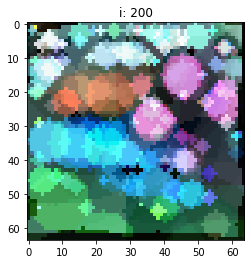

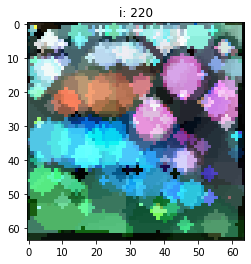

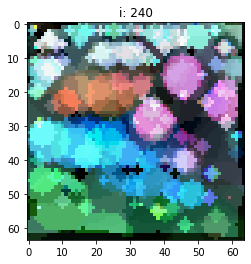

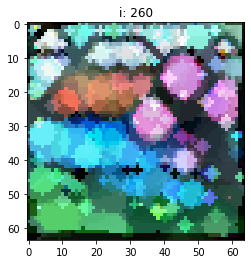

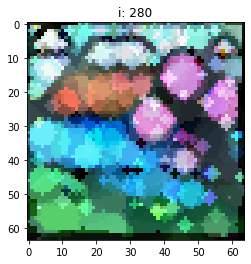

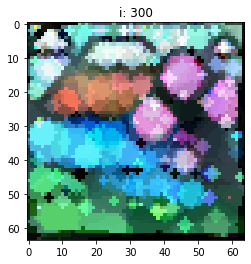

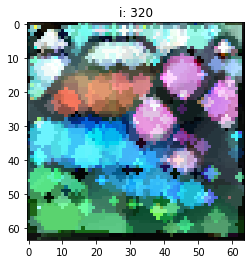

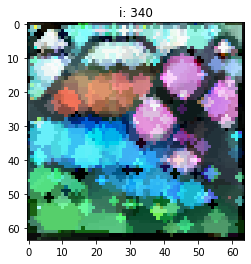

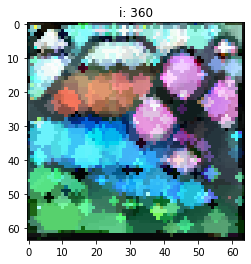

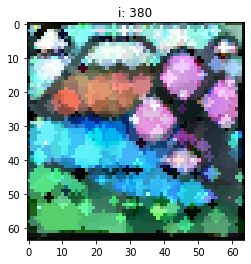

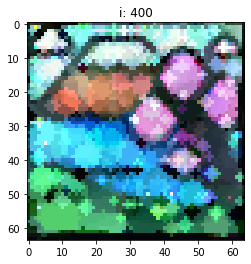

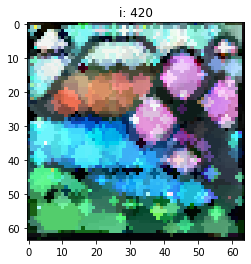

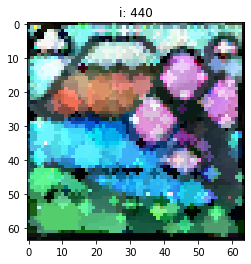

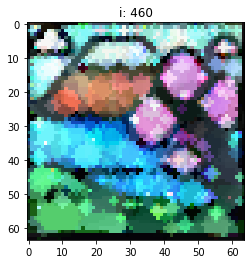

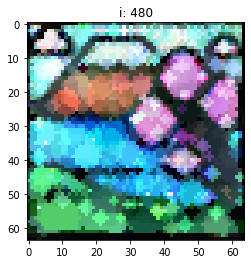

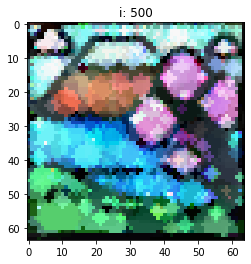

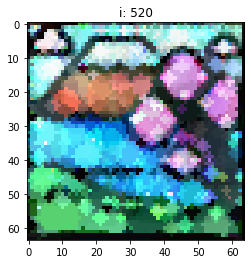

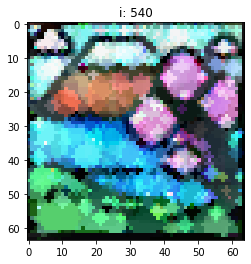

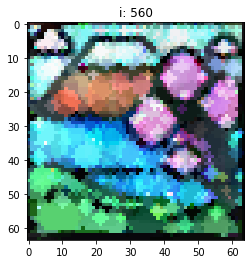

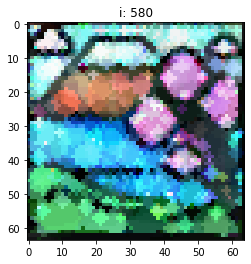

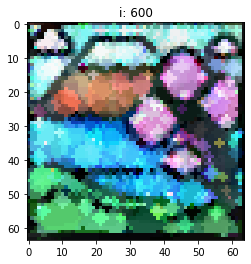

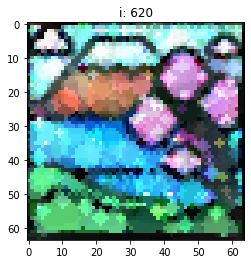

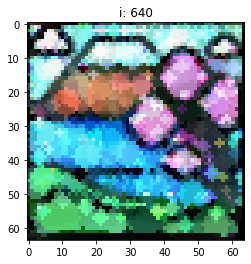

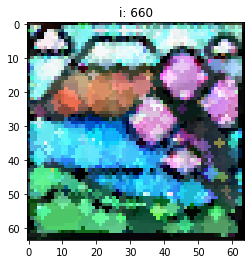

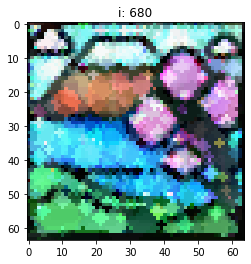

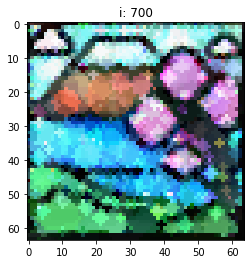

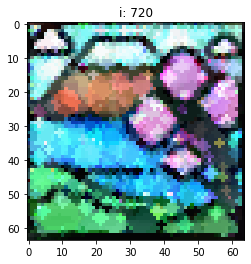

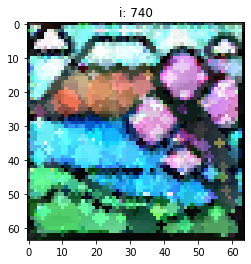

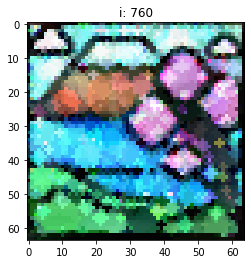

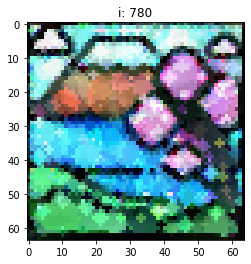

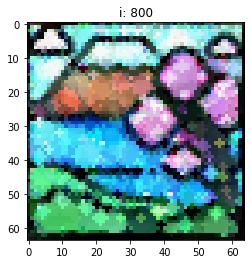

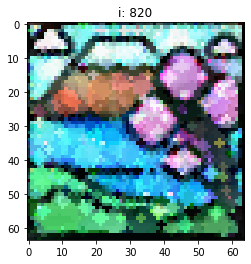

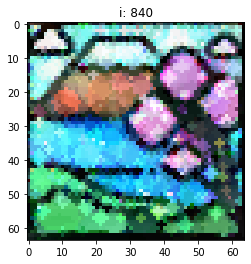

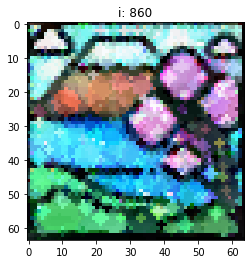

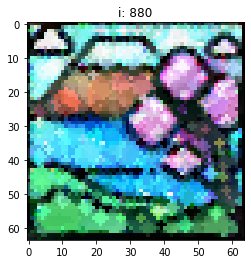

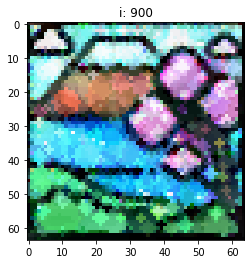

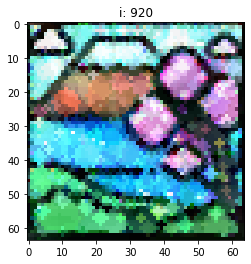

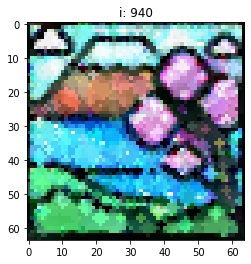

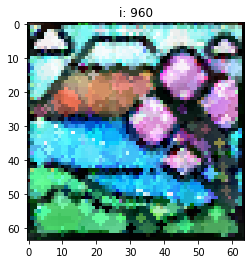

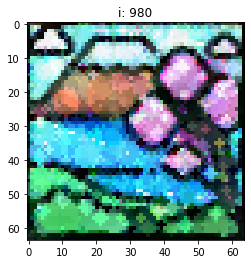

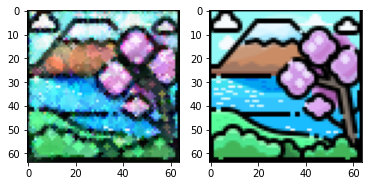

In [ ]:
directory = r'/content/drive/MyDrive/GeneratedImages'
os.chdir(directory)

img1 = np.zeros(img2.shape,np.uint8)

for i in range(1000):
  if i%20==0:
    imgStore = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    cv2.imwrite('img'+str(i)+'.png', imgStore)
    plt.figure()
    plt.title('i: '+str(i))
    plt.imshow(img1)
    plt.show()
  res = DE.differential_evolution(func=individual_fitness,bounds=b,args=(img1,img2),stopParameter=1,verbose=False,g=100)
  x=res[0]
  newCircle = np.zeros(img1.shape,np.uint8)
  newCircle = cv2.circle(newCircle,(abs(int(x[0])), abs(int(x[1]))),abs(int(x[2])),(abs(int(x[3])),abs(int(x[4])),abs(int(x[5])) ),-1)
  img1 = cv2.addWeighted(img1,1.0,newCircle,x[6],1)
  
cv2.imwrite('imgFinal.png', img1)
plt.figure()
plt.title('Final')
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

plt.show()

In [ ]:
imgStore = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
cv2.imwrite('imgFinal.png', imgStore)

True